In [11]:
import os
import json
import matplotlib.pyplot as plt

In [18]:
def get_data_from_master(master_file):
    with open(master_file, 'r') as fn:
        _dict = json.load(fn)
        return _dict
def convert_gaus_omega(omega_str): 
    decimal_num = "0."+omega_str[1:]
    return float(decimal_num)

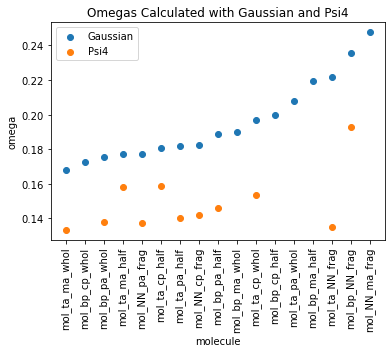

In [43]:
home = os.getcwd()
gaus_omegas_path = os.path.join(home,'master_omegas_gaus.json')
psi4_omegas_path = os.path.join(home,'master_omegas_psi4.json')

gaus_omegas = get_data_from_master(gaus_omegas_path)
sorted_gaus_omegas = {k: v for k, v in sorted(gaus_omegas.items(), key=lambda item: item[1])}
psi4_omegas = get_data_from_master(psi4_omegas_path)

y_gaus = []
y_psi4 = [] 

for mol in sorted_gaus_omegas.keys(): 
    y_gaus.append(convert_gaus_omega(gaus_omegas[mol]))
    try: 
        y_psi4.append(float(psi4_omegas[mol]))
    except KeyError: 
        y_psi4.append(None)

fig = plt.figure()

plt.scatter(x,y_gaus)
plt.scatter(x,y_psi4)
plt.xticks(rotation=90);
software = ['Gaussian', 'Psi4']
plt.legend(labels=software)
fig.patch.set_facecolor("w")
plt.xlabel("molecule")
plt.ylabel("omega")
plt.title("Omegas Calculated with Gaussian and Psi4")
plt.savefig('GaussianPsi4_omegas.png', dpi=300, bbox_inches='tight')

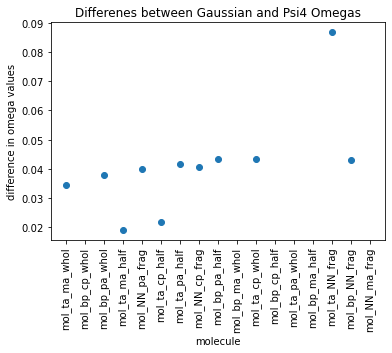

In [44]:
y = []

for mol in sorted_gaus_omegas.keys(): 
    try: 
        y.append(convert_gaus_omega(gaus_omegas[mol])-float(psi4_omegas[mol]))
    except KeyError: 
        y.append(None)

fig = plt.figure()

plt.scatter(x,y)
plt.xticks(rotation=90);
fig.patch.set_facecolor("w")
plt.xlabel("molecule")
plt.ylabel("difference in omega values")
plt.title("Differenes between Gaussian and Psi4 Omegas")
plt.savefig('GaussianPsi4Avg_omegas.png', dpi=300, bbox_inches='tight')